In [16]:
from pathlib import Path
from lagom.experiment import Configurator
from lagom.utils import pickle_load
from lagom.vis import CurvePlot


def load_loggings(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    
    out = []
    for seed_folder in p.iterdir():
        if seed_folder.is_dir() and (seed_folder/f).exists():
            out.append(pickle_load(seed_folder/f))
            
    return out


def get_items(loggings, key):
    out = []
    
    for logging in loggings:
        items = [x[key][0] for x in logging]
        out.append(items)
        
    return out

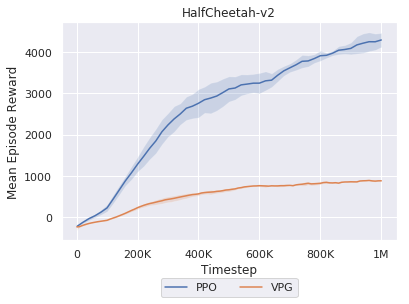

In [30]:
plot = CurvePlot()

x_key = 'accumulated_trained_timesteps'
y_key = 'running_mean_return'
ylabel = 'Mean Episode Reward'
#y_key = 'explained_variance'
#ylabel = 'Explained Variance'

log_folder = Path(f'ppo/logs/')
loggings = load_loggings(log_folder, 0, 'train_logs.pkl')
x = get_items(loggings, x_key)
y = get_items(loggings, y_key)
plot.add(f'PPO', y, xvalues=x)

log_folder = Path(f'vpg/logs/')
loggings = load_loggings(log_folder, 0, 'train_logs.pkl')
x = get_items(loggings, x_key)
y = get_items(loggings, y_key)
plot.add(f'VPG', y, xvalues=x)   
    

ax = plot(title=f'HalfCheetah-v2', 
          xlabel='Timestep', 
          ylabel=ylabel, 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[1.0], 
          alphas=[0.2])
legend = ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)
ax.figure.savefig('data/result.png', bbox_extra_artists=(legend,), bbox_inches='tight')